In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings("ignore")

### Checking column names with order

In [2]:
reference_data=pd.read_csv(r"C:\Users\syhussain\OneDrive - Huron Consulting Group\Desktop\EvidentlyAI\adult_train.csv")
del reference_data['target']
ref_data_columns=list(reference_data.columns)

In [3]:
current_data=pd.read_csv(r"C:\Users\syhussain\OneDrive - Huron Consulting Group\Desktop\EvidentlyAI\adult_test.csv")
del current_data['target']
cur_data_columns=list(current_data.columns)

In [4]:
ref_data_columns==cur_data_columns

True

### Checking Data Types

In [5]:
ref_dtype=reference_data.dtypes
cur_dtype=current_data.dtypes
check_dtype=ref_dtype==cur_dtype
data_types=pd.DataFrame(check_dtype)
issue_data_type=list(data_types[data_types[0]==False].index)
issue_data_type

[]

### Checking Data Drift

In [6]:
numerical_columns = list(reference_data.select_dtypes(include=[np.number]).columns)
categorical_columns = list(reference_data.select_dtypes(exclude=[np.number]).columns)

In [7]:
drifted_categorical_columns=[]
for i in categorical_columns:
    a,b=reference_data[i].unique(),current_data[i].unique()
    if len((set(b) - set(a))) > 0:
        drifted_categorical_columns.append(i) 

In [8]:
drifted_categorical_columns

[]

In [32]:
drifted_numerical_columns=[]
prob=[]
for i in numerical_columns:
    zscore,pvalue=ks_2samp(reference_data[i], current_data[i]) 
    prob.append(pvalue)
    if pvalue>0.05:
        pass
    else:
        drifted_numerical_columns.append(i)

In [42]:
pvalues=pd.DataFrame([numerical_columns,prob])
pvalues.columns=pvalues.loc[0]
pvalues=pvalues.iloc[1:,:]
pvalues

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
1,0.45732,0.564797,0.998035,0.999997,1.0,0.973047


In [10]:
drifted_numerical_columns

[]

### Plotting Distribution and saving it to PDF

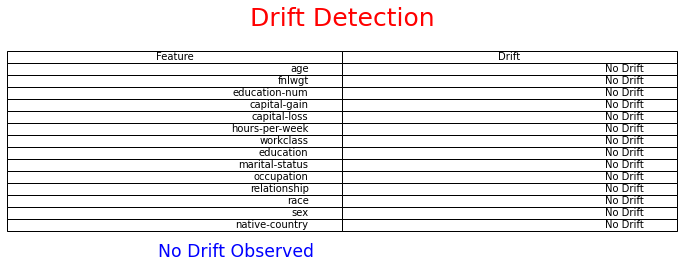

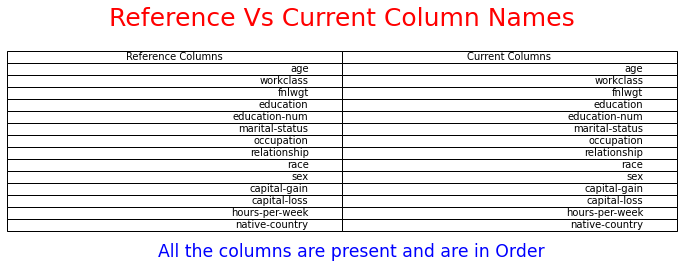

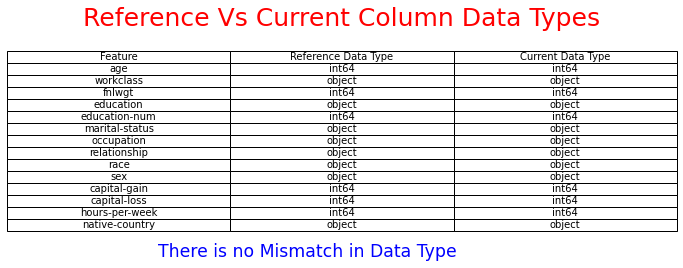

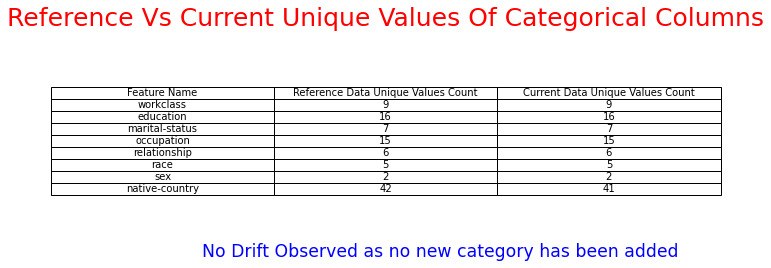

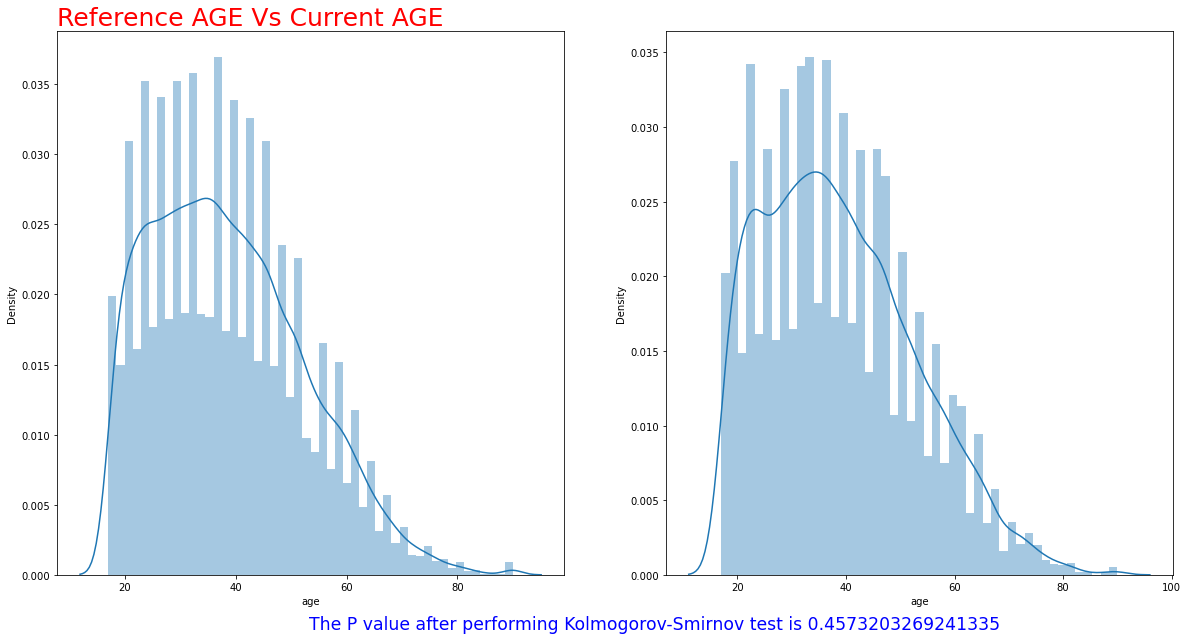

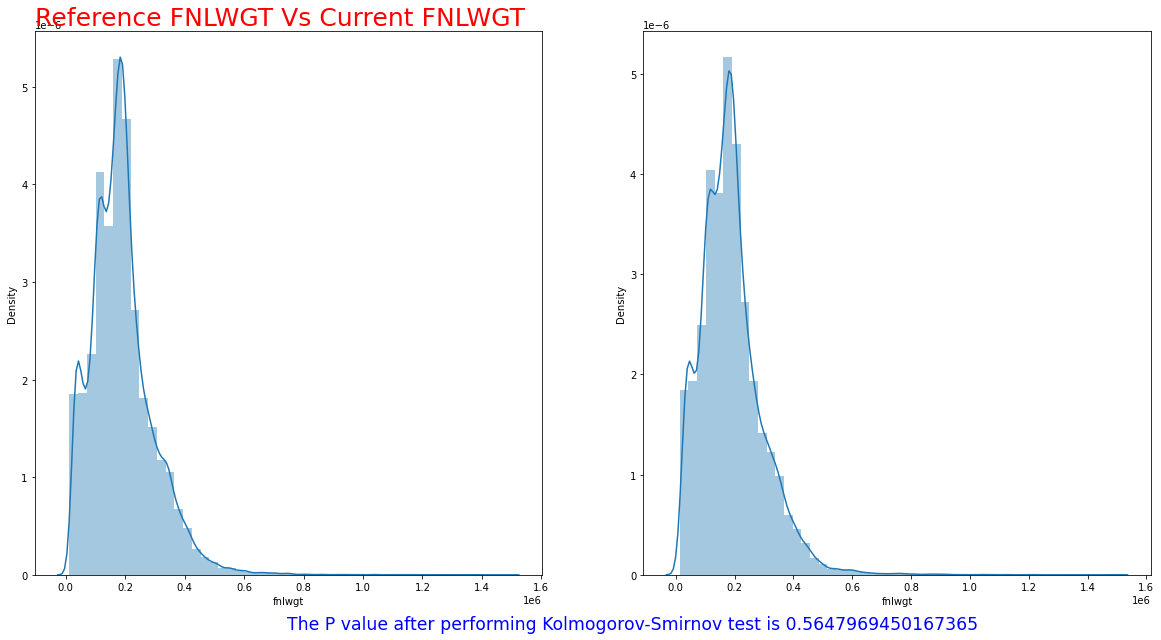

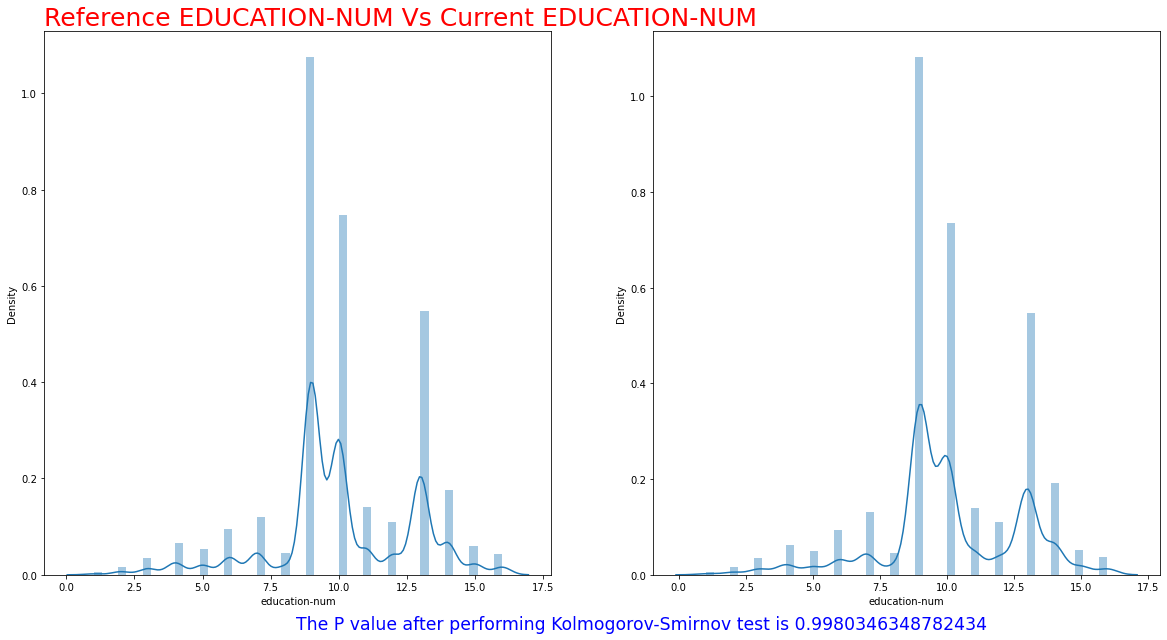

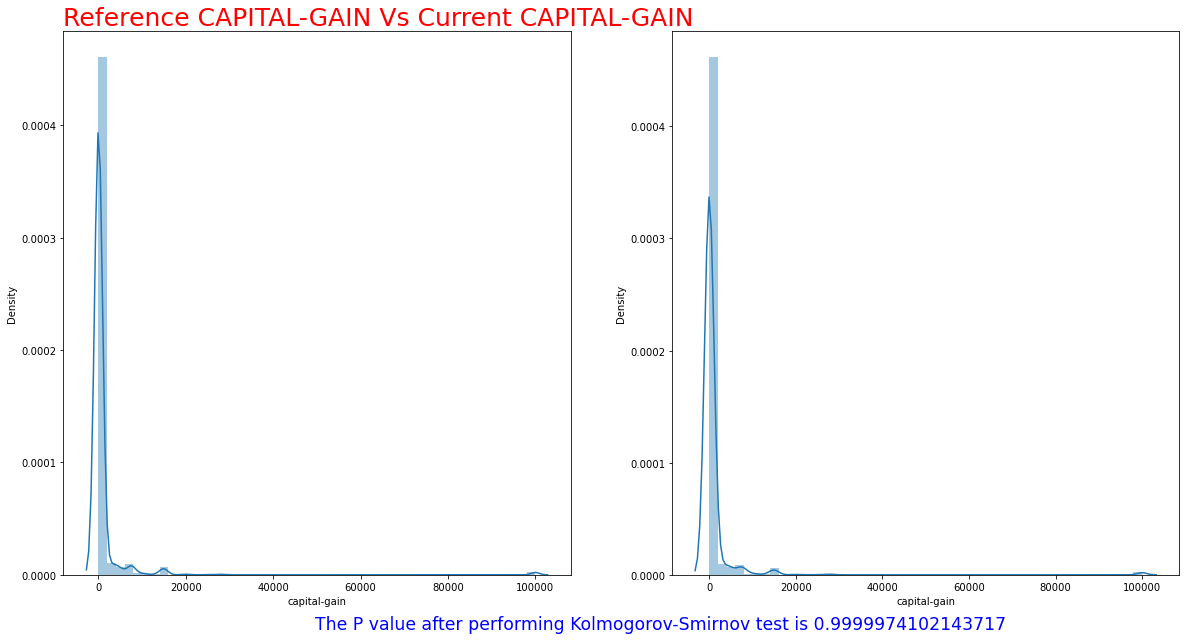

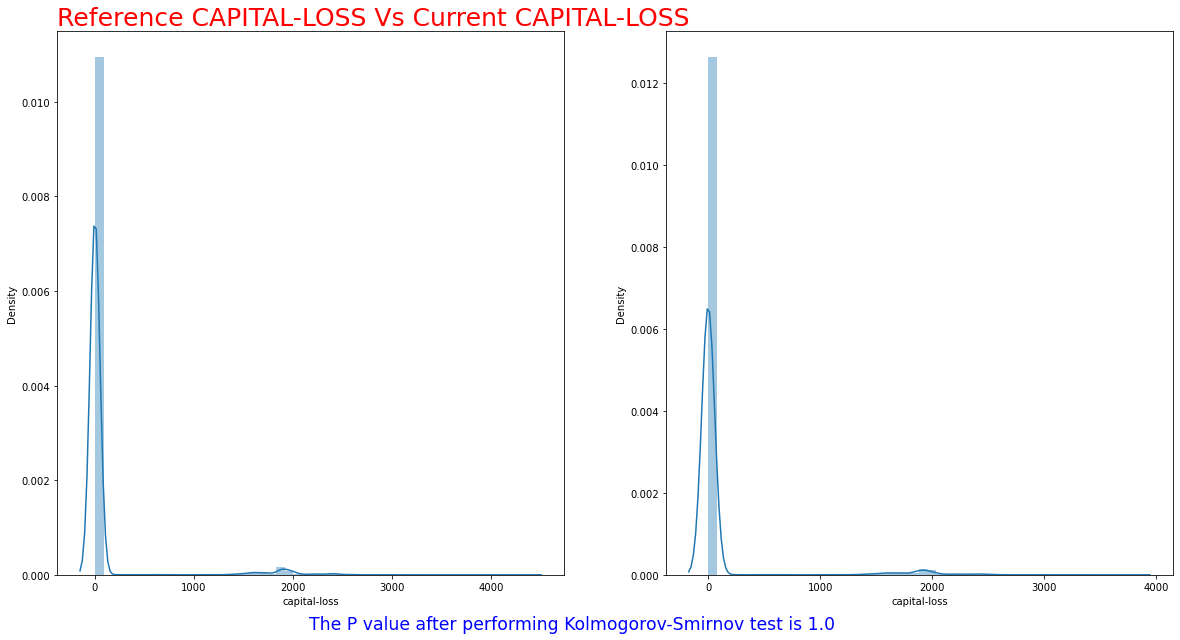

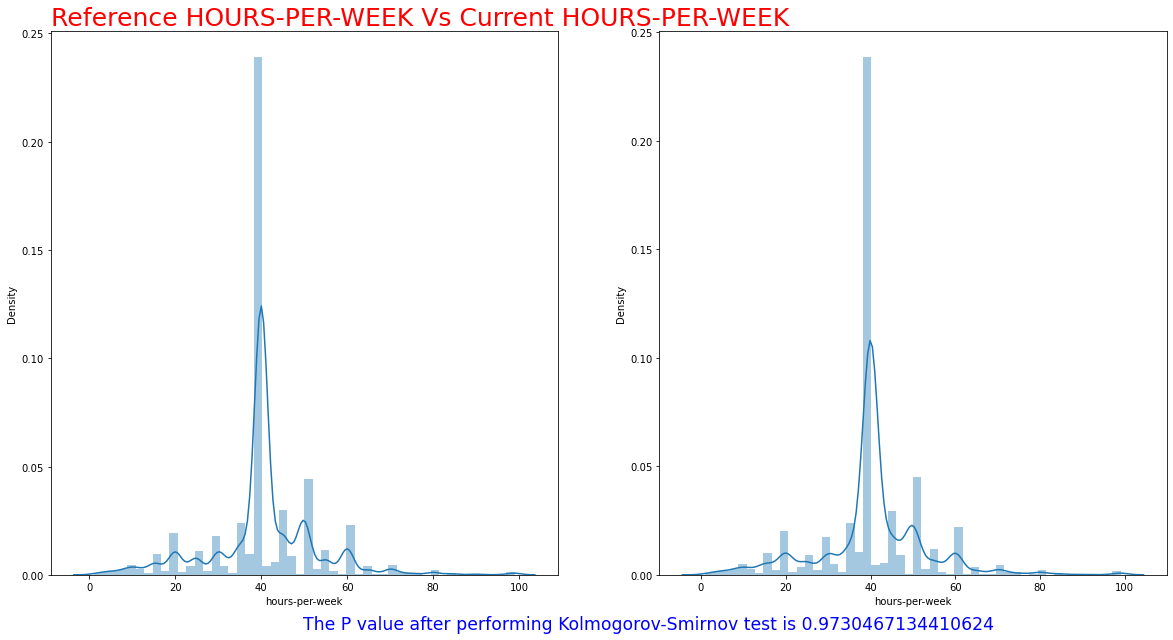

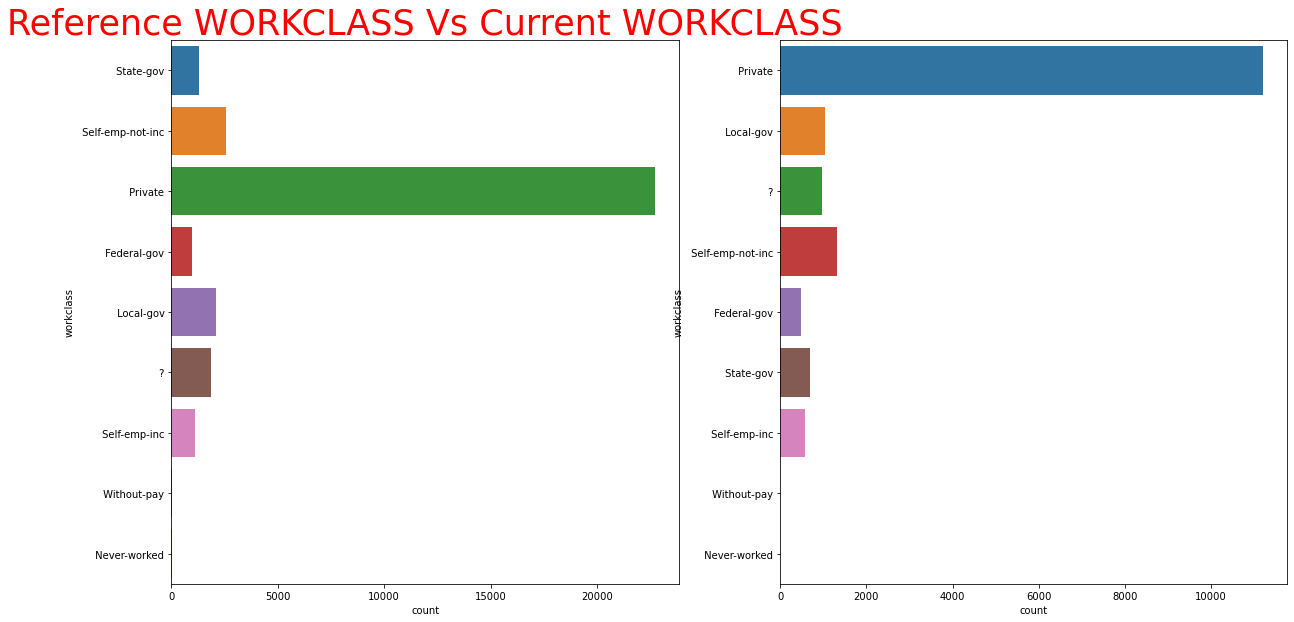

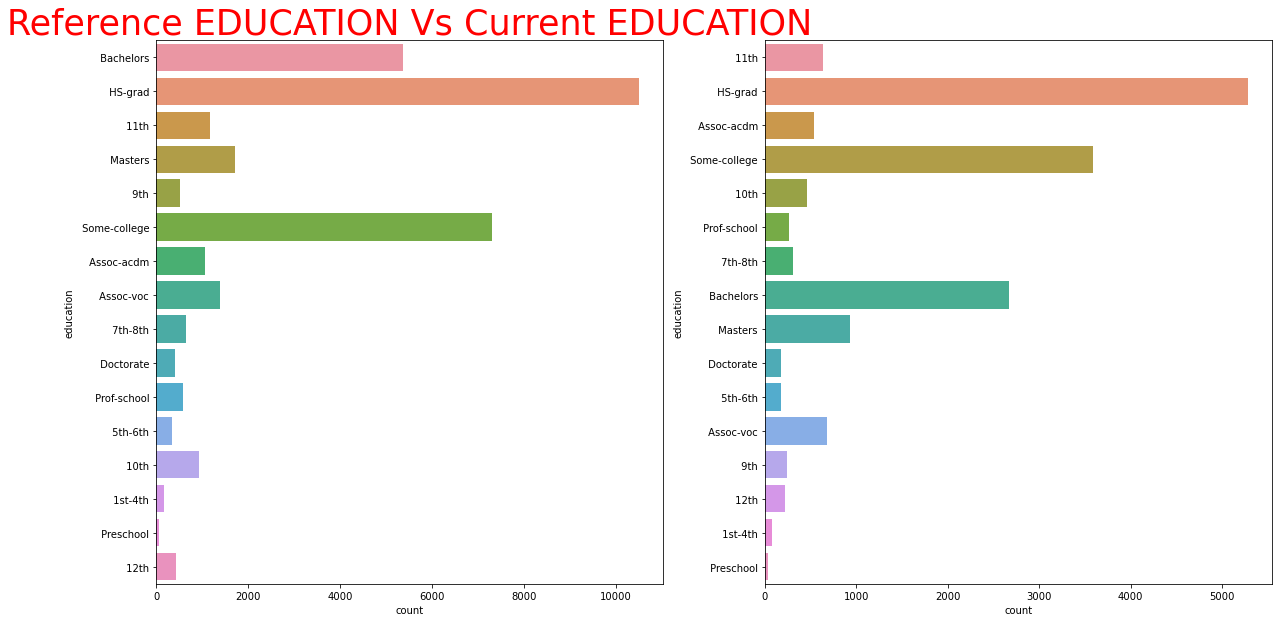

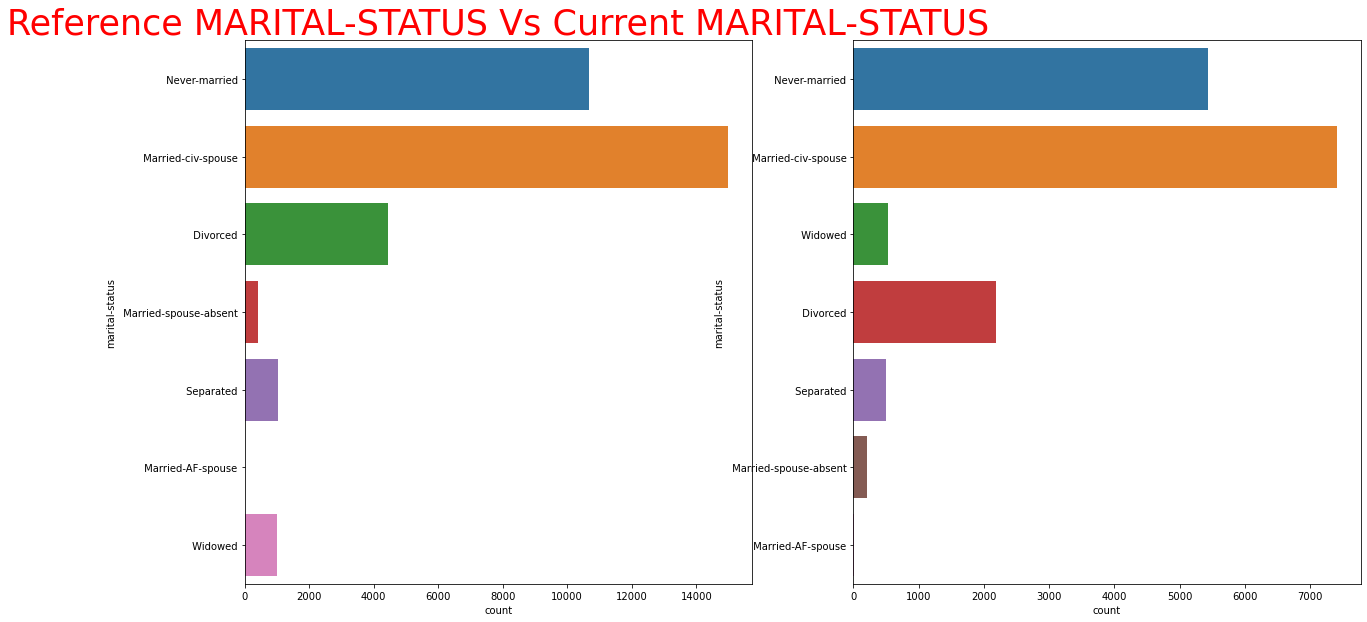

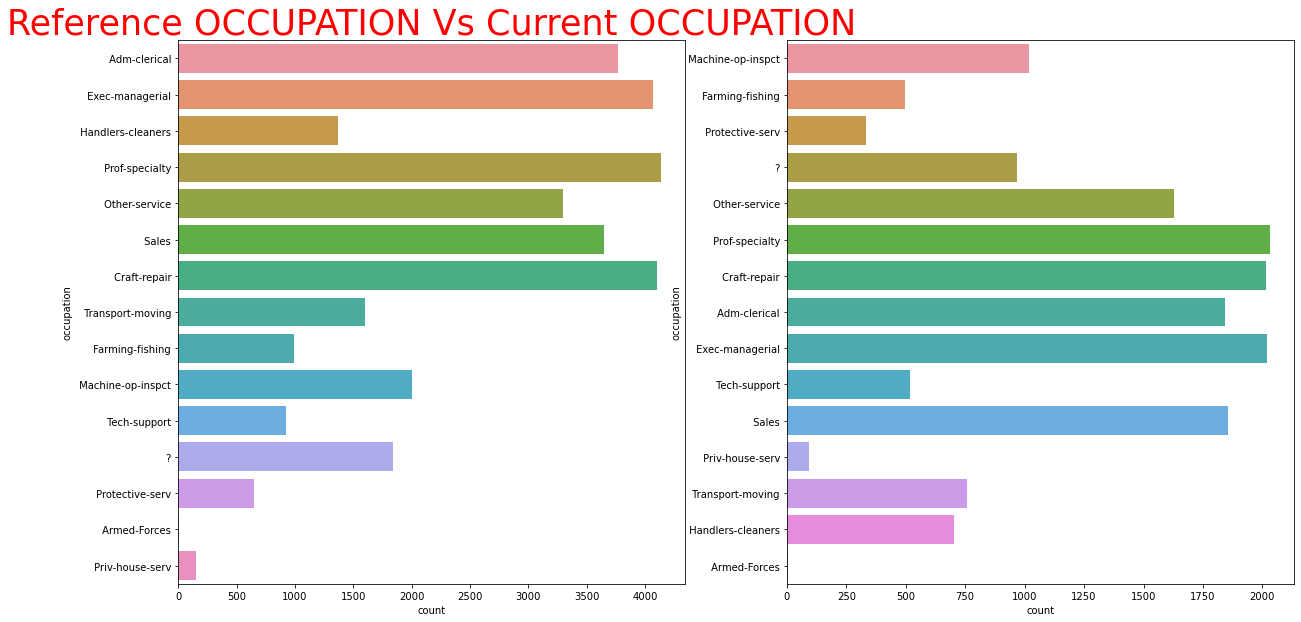

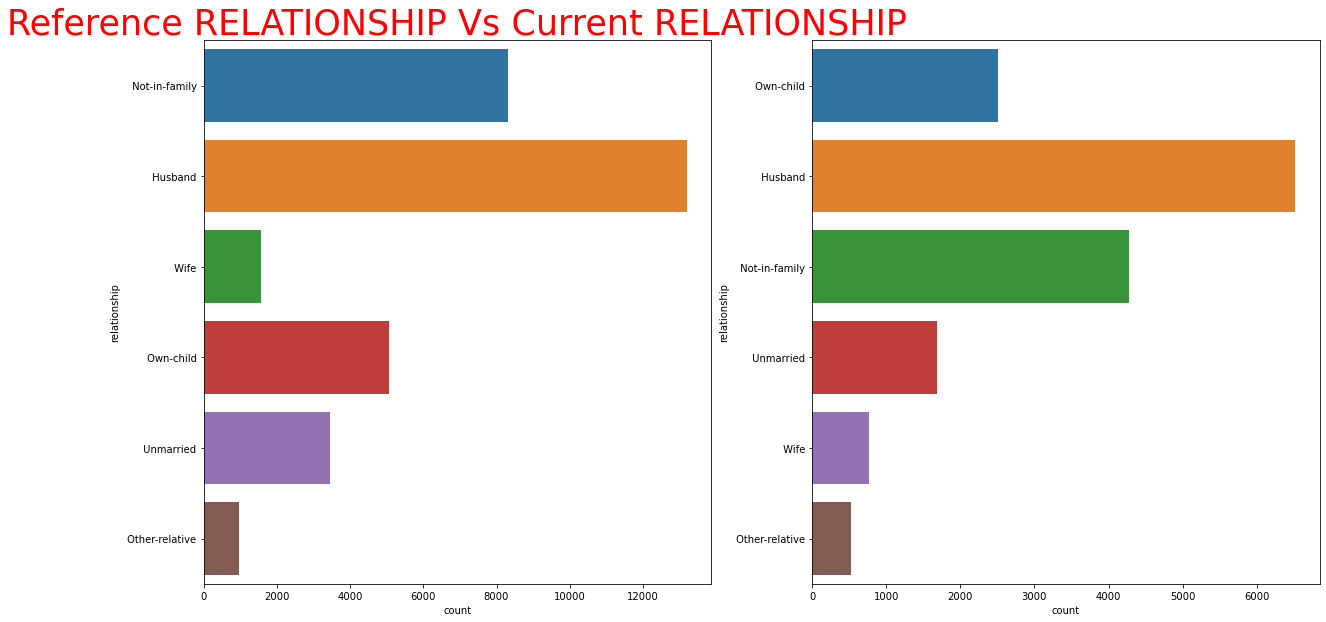

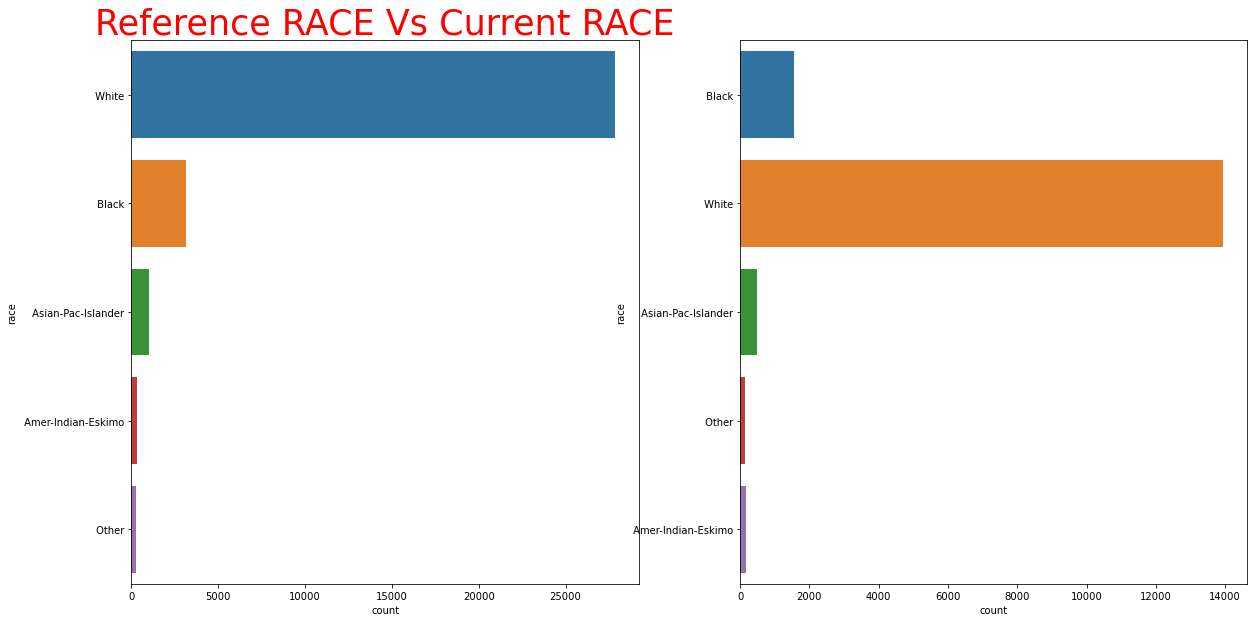

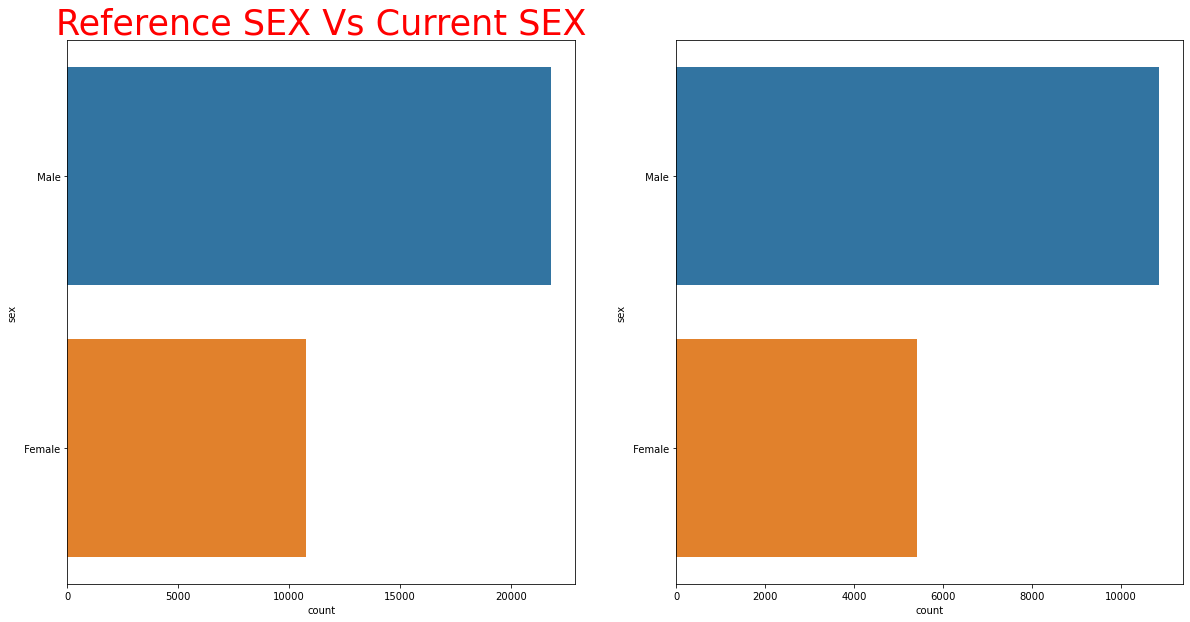

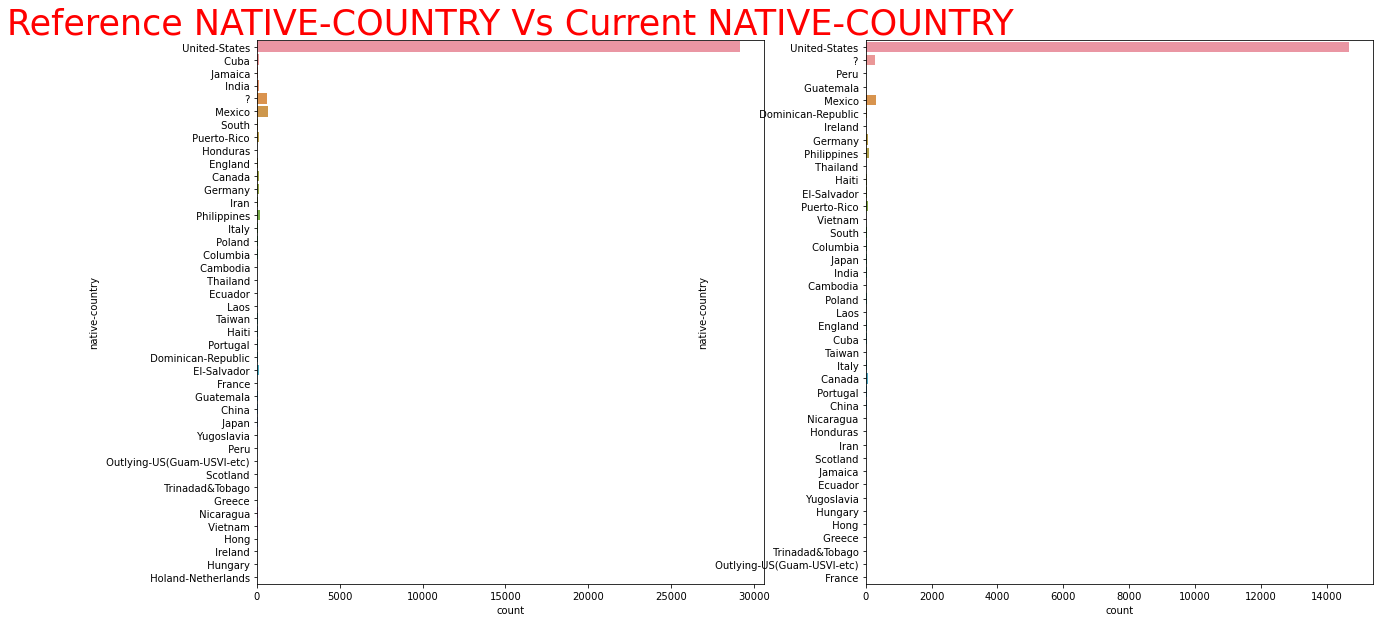

In [95]:
plt.rcParams["figure.figsize"] = (20,10)
drift_num=[]
for i in pvalues.columns:
    if pvalues[i][1]>0.05:
        drift_num.append('No Drift')
    else:
        drift_num.append('Drift')
drift_num=pd.DataFrame([numerical_columns,drift_num]).T
drift_num.columns=['Feature','Drift']
drift_cat=[]
for i in categorical_columns:
    a,b=reference_data[i].unique(),current_data[i].unique()
    if len((set(b) - set(a))) > 0:
        drift_cat.append('Drift')
    else:
        drift_cat.append('No Drift')
drift_cat=pd.DataFrame([categorical_columns,drift_cat]).T
drift_cat.columns=['Feature','Drift']
frames = [drift_num, drift_cat]
result = pd.concat(frames)
if ('Drift' in result['Drift']):
    txt='Drift Observed'
else:
    txt='No Drift Observed'
fig, ax =plt.subplots(figsize=(12,4))
Title='Drift Detection'
plt.title(Title,loc='center',fontsize=25,color='red')
fig.text(.3,.1,txt,fontsize ='xx-large',color='blue')
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=result.values,colLabels=result.columns,loc='center')
pp = PdfPages("Data_Drift.pdf")
pp.savefig(fig, bbox_inches='tight')
col_names=pd.DataFrame(ref_data_columns,cur_data_columns)
col_names = col_names.rename_axis('Reference Columns').reset_index()
col_names.columns=['Reference Columns','Current Columns']
fig, ax =plt.subplots(figsize=(12,4))
Title='Reference Vs Current Column Names'
if (ref_data_columns==cur_data_columns)==True:
    txt='All the columns are present and are in Order'
elif len(cur_data_columns)<len(ref_data_columns):
    txt='All the columns are not present'
elif len(cur_data_columns)==len(ref_data_columns):
    txt='All the columns are presnet but not in Order'
plt.title(Title,loc='center',fontsize=25,color='red')
fig.text(.3,.1,txt,fontsize ='xx-large',color='blue')
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=col_names.values,colLabels=col_names.columns,loc='center')
pp = PdfPages("Data_Drift.pdf")
pp.savefig(fig, bbox_inches='tight')
data_types=pd.DataFrame([ref_dtype,cur_dtype]).T
data_types = data_types.rename_axis('index1').reset_index()
data_types.columns=['Feature','Reference Data Type','Current Data Type']
fig, ax =plt.subplots(figsize=(12,4))
Title='Reference Vs Current Column Data Types'
if len(issue_data_type)>1:
    txt='There is a Mismatch in Data Type'
else:
    txt='There is no Mismatch in Data Type'
plt.title(Title,loc='center',fontsize=25,color='red')
fig.text(.3,.1,txt,fontsize ='xx-large',color='blue')
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=data_types.values,colLabels=data_types.columns,loc='center',cellLoc='center')
pp = PdfPages("Data_Drift.pdf")
pp.savefig(fig, bbox_inches='tight')
colu=[]
ref_cou=[]
cur_cou=[]
for i in categorical_columns:
    colu.append(i)
    ref_cou.append(reference_data[i].nunique())
    cur_cou.append(current_data[i].nunique())
unique_counts=pd.DataFrame([colu,ref_cou,cur_cou]).T
unique_counts.columns=['Feature Name','Reference Data Unique Values Count','Current Data Unique Values Count']
fig, ax =plt.subplots(figsize=(12,4))
Title='Reference Vs Current Unique Values Of Categorical Columns'
if len(drifted_categorical_columns)>1:
    txt='Drifted observed due to addition of new category'
else:
    txt='No Drift Observed as no new category has been added'
plt.title(Title,loc='center',fontsize=25,color='red')
fig.text(.3,.1,txt,fontsize ='xx-large',color='blue')
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=unique_counts.values,colLabels=unique_counts.columns,loc='center',cellLoc='center')
pp = PdfPages("Data_Drift.pdf")
pp.savefig(fig, bbox_inches='tight')
for i in numerical_columns:
    fig1 = plt.figure(i)
    plt.subplot(1,2,1)
    pval=pvalues[i]
    txt=f'The P value after performing Kolmogorov-Smirnov test is {pval[1]}'
    Title='Reference '+i.upper()+' Vs Current '+i.upper()
    plt.title(Title,loc='left',fontsize=25,color='red')
    fig1.text(.3,0.05,txt,fontsize ='xx-large',color='blue')
    sns.distplot(reference_data[i])
    fig2 = plt.figure(i)
    plt.subplot(1,2,2)
    sns.distplot(current_data[i])
for i in categorical_columns:
    fig1 = plt.figure(i)
    plt.subplot(1,2,1)
    Title='Reference '+i.upper()+' Vs Current '+i.upper()
    plt.title(Title,loc='center',fontsize=35,color='red')
    sns.countplot(y=reference_data[i])
    fig2 = plt.figure(i)
    plt.subplot(1,2,2)
    sns.countplot(y=current_data[i])
    pp = PdfPages("Data_Drift.pdf")
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()